In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Bidirectional
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sys
import os
# Obtener la ruta del directorio actual
current_dir = os.getcwd()

# Construir la ruta relativa al directorio que quieres agregar
relative_dir = os.path.join(current_dir, 'mis_pkgs/')

# Agregar la ruta relativa al sys.path
sys.path.insert(0, relative_dir)

from MIOPATIA_db import DB_management as db 


Voy a quedarme con los 62 atunes con su última medida

In [10]:
filename = "hdf_28_06_atunes_agilent_clasificados.hdf"
with pd.HDFStore(filename,complib="zlib",complevel=4) as hdf_db:
    pre_p_e1  = hdf_db.get('data/pollos_estado')
    # p_e =pre_p_e1.drop_duplicates(subset = ['Pollo', 'Medida'],  keep = 'last').reset_index(drop = True)
    t    = hdf_db.get('data/tabla')
    X_train=np.zeros((pre_p_e1.shape[0],401,8))
    y_train=np.zeros((pre_p_e1.shape[0],1))
    x=0
    for index, row in pre_p_e1.iterrows():   # El primer registro no se toma en cuenta porque es basura
        Primero = int(row['Primero'])
        Ultimo  = int(row['Ultimo'])
        estado  = int(row['Estado'])
        print(Primero)
        print(Ultimo)
        print(estado)
        if estado == 0 or estado== 1:
            target = 1
        else:
            target = 0
        pepito=np.array(t.iloc[Primero:Ultimo+1])
        # #print(pepito.shape)
        X_train[x]=pepito[:,3:11]
        print(X_train[x][0:4,:])       
        y_train[x]=target
        x=x+1


print(X_train.shape)
print(y_train.shape)
#print(X_train[0:4,:,:])

0
400
0
[[ 2.11548583e+05 -2.41023444e-01  4.48948241e+03  1.82646509e+04
   1.88083206e+04 -1.32977288e+00  2.05433600e+05 -5.04959300e+04]
 [ 2.00995358e+05  1.91218305e-01 -3.66824953e+03  1.89491848e+04
   1.93009756e+04 -1.76201463e+00  1.97331900e+05  3.82002000e+04]
 [ 1.55641236e+05 -8.40308325e-01  1.81014739e+04  1.62152414e+04
   2.43022101e+04 -7.30488002e-01  1.03849000e+05 -1.15929200e+05]
 [ 2.05898070e+05  5.33430353e-02 -9.54981716e+02  1.78856667e+04
   1.79111436e+04 -1.62413936e+00  2.05605200e+05  1.09780200e+04]]
401
801
0
[[ 2.11548583e+05 -2.41023444e-01  4.48948241e+03  1.82646509e+04
   1.88083206e+04 -1.32977288e+00  2.05433600e+05 -5.04959300e+04]
 [ 2.00995358e+05  1.91218305e-01 -3.66824953e+03  1.89491848e+04
   1.93009756e+04 -1.76201463e+00  1.97331900e+05  3.82002000e+04]
 [ 1.55641236e+05 -8.40308325e-01  1.81014739e+04  1.62152414e+04
   2.43022101e+04 -7.30488002e-01  1.03849000e+05 -1.15929200e+05]
 [ 2.05898070e+05  5.33430353e-02 -9.54981716e+02 

In [11]:
print(X_train[1][0:4][:])

[[ 2.11548583e+05 -2.41023444e-01  4.48948241e+03  1.82646509e+04
   1.88083206e+04 -1.32977288e+00  2.05433600e+05 -5.04959300e+04]
 [ 2.00995358e+05  1.91218305e-01 -3.66824953e+03  1.89491848e+04
   1.93009756e+04 -1.76201463e+00  1.97331900e+05  3.82002000e+04]
 [ 1.55641236e+05 -8.40308325e-01  1.81014739e+04  1.62152414e+04
   2.43022101e+04 -7.30488002e-01  1.03849000e+05 -1.15929200e+05]
 [ 2.05898070e+05  5.33430353e-02 -9.54981716e+02  1.78856667e+04
   1.79111436e+04 -1.62413936e+00  2.05605200e+05  1.09780200e+04]]


In [12]:
print(y_train[1:20])

[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [13]:
#print(p_e)
X_train_filtrado = X_train[2:][:,:]
y_train_filtrado = y_train[2:]
print(X_train_filtrado.shape)
print(y_train_filtrado.shape)
print(X_train_filtrado[0][:,:])

(92, 401, 8)
(92, 1)
[[ 4.58605976e+05 -3.40039382e-01  2.89366204e+03 ... -1.23075695e+00
   4.32346900e+05 -1.52956200e+05]
 [ 3.52716440e+05 -2.91178204e-01  3.15750530e+03 ... -1.27961812e+00
   3.37869300e+05 -1.01258200e+05]
 [ 3.85695825e+05  3.09257462e-02 -3.03232999e+02 ... -1.60172207e+00
   3.85511400e+05  1.19260300e+04]
 ...
 [ 5.83057856e+03 -1.29203075e+00  2.76058054e+01 ... -2.78765578e-01
   1.60439500e+03 -5.60549400e+03]
 [ 5.71802734e+03 -1.29459224e+00  2.74655218e+01 ... -2.76204090e-01
   1.55933800e+03 -5.50130000e+03]
 [ 5.54659975e+03 -1.31171352e+00  2.77364894e+01 ... -2.59082806e-01
   1.42100600e+03 -5.36148400e+03]]


Vamos a normalizar o escalar los datos

In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_2d = X_train_filtrado.reshape(-1, X_train_filtrado.shape[-1])
normalized_data_2d = scaler.fit_transform(data_2d)
X_train_Normalizado=normalized_data_2d.reshape(X_train_filtrado.shape)
y_train_Normalizado=y_train_filtrado # los valores ya estaban normalizados
print(X_train_Normalizado[0])

[[4.36981594e-01 5.76664849e-01 4.95168473e-02 ... 4.23335151e-01
  4.85464472e-01 6.43673035e-01]
 [3.35756981e-01 6.04756515e-01 5.02793164e-02 ... 3.95243485e-01
  3.79179678e-01 6.96792643e-01]
 [3.67283472e-01 7.89943146e-01 4.02782797e-02 ... 2.10056854e-01
  4.32775777e-01 8.13089250e-01]
 ...
 [4.15304234e-03 2.93382078e-02 4.12343563e-02 ... 9.70661792e-01
  8.90581535e-04 7.95075638e-01]
 [4.04544953e-03 2.78655360e-02 4.12339509e-02 ... 9.72134464e-01
  8.39893605e-04 7.95182697e-01]
 [3.88157411e-03 1.80220276e-02 4.12347340e-02 ... 9.81977972e-01
  6.84273775e-04 7.95326358e-01]]


In [15]:
%load_ext tensorboard

# %tensorboard --logdir logs
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [16]:
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True),input_shape=(401, 8)))
model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(Bidirectional(LSTM(50, return_sequences=False)))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train_Normalizado, y_train_Normalizado, epochs=5000, batch_size=20, callbacks=[tensorboard_callback])
# Final evaluation of the model
scores = model.evaluate(X_train_Normalizado, y_train_Normalizado, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirecti  (None, 401, 100)          23600     
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 401, 100)          60400     
 onal)                                                           
                                                                 
 bidirectional_6 (Bidirecti  (None, 401, 100)          60400     
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 100)               60400     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 50)               

2024-03-05 10:47:37.554520: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-05 10:47:39.577878: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fc9d1a0f7d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-05 10:47:39.577959: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2024-03-05 10:47:39.594735: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709635659.923392    4527 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 [==============================] - 16s 279ms/step - loss: 0.7065 - accuracy: 0.5109
Epoch 2/5000
5/5 [==============================] - 1s 261ms/step - loss: 0.6983 - accuracy: 0.5978
Epoch 3/5000
5/5 [==============================] - 1s 250ms/step - loss: 0.6819 - accuracy: 0.5978
Epoch 4/5000
5/5 [==============================] - 1s 253ms/step - loss: 0.6820 - accuracy: 0.5978
Epoch 5/5000
5/5 [==============================] - 1s 262ms/step - loss: 0.6803 - accuracy: 0.5978
Epoch 6/5000
5/5 [==============================] - 1s 244ms/step - loss: 0.6744 - accuracy: 0.5978
Epoch 7/5000
5/5 [==============================] - 1s 248ms/step - loss: 0.6740 - accuracy: 0.5978
Epoch 8/5000
5/5 [==============================] - 1s 243ms/step - loss: 0.6709 - accuracy: 0.5978
Epoch 9/5000
5/5 [==============================] - 1s 259ms/step - loss: 0.6722 - accuracy: 0.6087
Epoch 10/5000
5/5 [==============================] - 1s 245ms/step - loss: 0.6712 - accuracy: 0.6196
Epoch 11/50

In [17]:
y_pred = model.predict(X_train_Normalizado)
y_pred2=np.round(y_pred[:,-1]).astype(int)
print(y_pred[0:10])
print(y_pred2[0:10])
print(y_train_Normalizado[0:10])


3/3 [==============================] - 3s 73ms/step
[[5.3840511e-05]
 [8.9646586e-05]
 [3.7754860e-05]
 [4.3143824e-05]
 [4.3143824e-05]
 [4.8544527e-05]
 [9.9994802e-01]
 [9.9991834e-01]
 [9.9990451e-01]
 [1.3682613e-04]]
[0 0 0 0 0 0 1 1 1 0]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]]


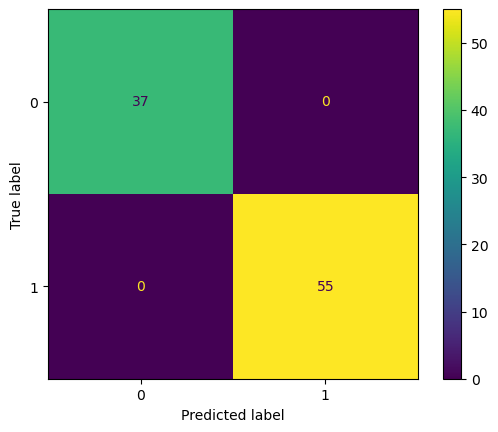

In [18]:
#docs_infra: no_execute

cm=confusion_matrix(y_train_Normalizado, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
model.save('modelos/modelote0503')  # creates a HDF5 file 'my_model.h5'